# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [2]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

C:\Users\koobie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


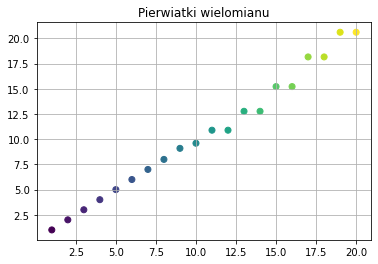

In [3]:
W = np.linspace(1,20,20)
x = main.polly_A(W)
x2 = main.roots_20(x)[1]
plt.scatter(W,x2, c=W)
plt.grid()
plt.title('Pierwiatki wielomianu')
plt.show()

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

In [14]:
w_1 = np.ones(8)
p_1 = main.polly_A(w_1)
print('Macierz frobenusa, wartości własne oraz rozkład Shura zostały zaimplementowane w funcji w mainie')
print(main.frob_a(p_1[::-1]))
print('funkcja polyroots')
print(np.polynomial.polynomial.polyroots(p_1))

Macierz frobenusa, wartości własne oraz rozkład Shura zostały zaimplementowane w funcji w mainie
(array([[  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
       [ -1.,   8., -28.,  56., -70.,  56., -28.,   8.,  -1.]]), array([-4.69153788+0.j        ,  0.2884918 +1.6889081j ,
        0.2884918 -1.6889081j ,  0.51507253+0.66306355j,
        0.51507253-0.66306355j,  0.52161447+0.30995694j,
        0.52161447-0.30995694j,  0.52059013+0.09353964j,
        0.52059013-0.09353964j]), (array([[-4.69153788e+00, -9.29392730e-01, -1.26194300e+01,
        -3.

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


In [15]:
w_2 = np.array([243, -486, 738, 990, 558, -28, -72, 16])
p_2 = main.polly_A(w_2)
print('Macierz frobenusa, wartości własne oraz rozkład Shura zostały zaimplementowane w funcji w mainie')
print(main.frob_a(p_2[::-1]))

Macierz frobenusa, wartości własne oraz rozkład Shura zostały zaimplementowane w funcji w mainie
(array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.0

***Zadanie 4.***

Dany jest wielomian: 
$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [17]:
w_3 = np.array([1, -156, -5, 780, 4, -624])
print(np.polynomial.chebyshev.chebroots(w_3))

[-1.         -0.74928977  0.00178062  0.75071428  1.        ]
